In [92]:
import http.client 
import mimetypes
import json
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [51]:
import http.client
import mimetypes
conn = http.client.HTTPSConnection("api.twitter.com")
payload = ''
headers = {
  'Authorization': 'Bearer', #add bearer key
  'Cookie': 'personalization_id="'# add personalization
}
conn.request("GET", "/1.1/search/tweets.json?q=BlackLivesMatter%20since:2020-05-20&lang=en&%23protestl&result_type=recent", payload, headers)
res = conn.getresponse()
data = res.read()
#print(data.decode("utf-8"))

unstructured_tweets = json.loads(data)
indent_tweets = json.dumps(json.loads(data), indent=2)
#print(indent_tweets)
#print(unstructured_tweets)
data = json.loads(indent_tweets)


In [75]:
with open('tweets.json', 'w') as f:
    json.dump(data, f, indent=4)

In [96]:
text = ''
with open("game.txt", "w", encoding='utf-8') as text_file:
    for status in data['statuses']:
        text += status['text']
        text += ' '
        print(status['text'])
        text_file.write(status['text'])

We are living in 21st century and there is racism in the world which  caused the protest for black rights with… https://t.co/y6CclKtATO
RT @Lady44Sassy: #BlackLivesMatter are nothing but scum ..Always attack in packs, to cowardly for one on one... Look at them all surroundin…
#BlackLivesMatter protests showed that people all over the world are tired of racism and discrimination. They want… https://t.co/mnA8oiOqAx
RT @BKCASHMERE: "What's Going On Now" Out Now 🔥🔥🔥 #linkinbio https://t.co/N2dMYqtjbX Subscribe to the Channel!!! #Newvideo #film #videogame…
Today a white dude that I see at work and generally enjoy talking to said to me: “I don’t agree with any of that sh… https://t.co/A0tJWqwpbV
RT @MarxistKittyCat: If you follow me, I will follow you back as soon as Twitter let's me! 

🐢Slowly 🐢 but 🐢 surely 🐢

@MarxistKittyCat

#N…
RT @kenmagukkie: since blm is slowly fading away from my tl and my other social media’s, here’s a thread+petitions you can sign #BlackLives…
RT @SJDKennington: 

In [60]:
for status in data['statuses']:
    print(status['user']['location'])



Tehran
USA
Santa Cruz, CA
Los Angeles, CA

Thurrock 

USA

Islamic Republic of Iran
Azle, TX

Colorado


In [114]:
comment_words = ''
stopwords = set(STOPWORDS)
bad_chars = [';', ':', '!', "*"] 
for val in text.split(' '):
    val = str(val)
    for i in bad_chars : 
        val = val.replace(i, '')
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    if len(val)> 4:
        comment_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(comment_words)
print(comment_words)
    

living century there racism world which caused protest black rights with… https//t.co/y6cclktato @lady44sassy #blacklivesmatter nothing ..always attack packs, cowardly one... surroundin… #blacklivesmatter protests showed people world tired racism discrimination. want… https//t.co/mna8oioqax @bkcashmere "what's going #linkinbio https//t.co/n2dmyqtjbx subscribe channel #newvideo #film #videogame… today white generally enjoy talking don’t agree https//t.co/a0tjwqwpbv @marxistkittycat follow follow twitter let's 🐢slowly surely 🐢 @marxistkittycat #n… @kenmagukkie since slowly fading other social media’s, here’s thread+petitions #blacklives… @sjdkennington thanks ⁦@utcai_⁩ leadership inspiration. bring things change together @btsloonapop hallyu eventually koreans educate themselves other cultures #나는_샘_오취리와_연대합니다 #i_stand_with_sam_… @sailorrooscout psst. #blacklivesmatter always relevant. going away. keep protesting. keep signing peti… #blacklivesmatter protests showed people world tired rac

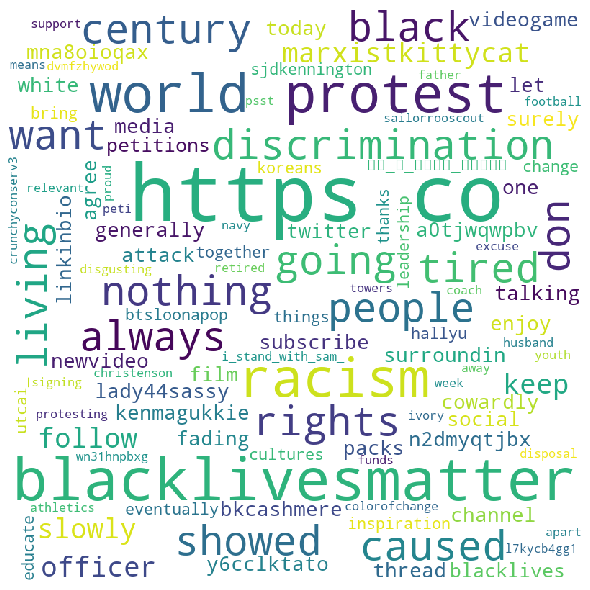

In [115]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()